In [98]:
import sys
import os
base = os.path.dirname(os.getcwd())
sys.path.insert(0, base + '/util')
from image_processing_fns import *
import numpy as np

In [64]:
im_path = base + '/data/test/images'
matrix_path = base + '/data/test/images_numpy'
pickles_path = base + '/data/test/features/feat_dict.p'
MAX_ARRAY_SIZE = 100

In [45]:
from __future__ import absolute_import
from __future__ import print_function

import pickle

import numpy
from six.moves import range

from  scipy.spatial import KDTree

all_feats = pickle.load(open(pickles_path, "rb"))
count = -1

N = len(all_feats)
D = 4096
X = dict()

In [71]:
nparr = np.ndarray((N,D))
for k in all_feats:
    nparr[k-1] = all_feats[k]
print("Size of Input array", nparr.shape)

Size of Input array (569, 4096)


In [72]:
print('Building tree using scipy.spatial')
T = KDTree(nparr)
print('done.')

Building tree using scipy.spatial
done.


In [80]:
knn_1 = T.query(nparr[500], k=2)
print(('KNN(1)           : ', knn_1))

('KNN(1)           : ', (array([  0.        ,  72.95685707]), array([500, 238])))


In [65]:
array_dict = dict()
for m in os.listdir(matrix_path):
    array = np.load(os.path.join(matrix_path, m))
    array_num = int(m[:-4])
    
    if array_num in array_dict:
        array_dict[array_num].extend(array)
    else:
        array_dict[array_num] = array
    print("Loaded array {}, array num: {}".format(m, array_num))
for k in array_dict:
    print (len(array_dict[k]))

Loaded array 0.npy, array num: 0
Loaded array 1.npy, array num: 1
Loaded array 2.npy, array num: 2
Loaded array 3.npy, array num: 3
Loaded array 4.npy, array num: 4
Loaded array 5.npy, array num: 5
100
100
100
100
100
69


In [93]:
from math import floor
def test_ims(arraydict, max_array_size, idxs):
    
    for i in idxs:
        i = int(i)
        array_num = floor(i/ 100)
        im_indx = i % 100
        im = arraydict[array_num][im_indx]
        fname = str(array_num * max_array_size + im_indx ) + ".jpg"
        print("Matrix num: {} idx: {}: image file: {}".format(
            array_num, im_indx, fname))
        print("near neighbor image")
        displayImageInline(im)
    print()
    print()


def print_og(idx):
    print("original image")
    test_ims(array_dict, MAX_ARRAY_SIZE, [str(idx)])


[  0 461]
********Original*******
original image
Matrix num: 0 idx: 0: image file: 0.jpg
near neighbor image


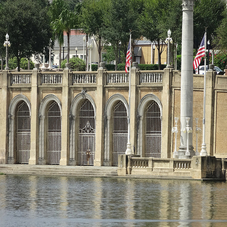



********Neighbor*******
original image
Matrix num: 4 idx: 61: image file: 461.jpg
near neighbor image


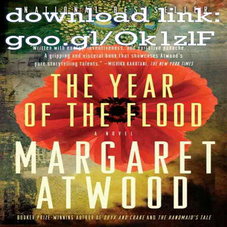



[  1 111]
********Original*******
original image
Matrix num: 0 idx: 1: image file: 1.jpg
near neighbor image


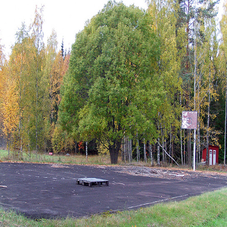



********Neighbor*******
original image
Matrix num: 1 idx: 11: image file: 111.jpg
near neighbor image


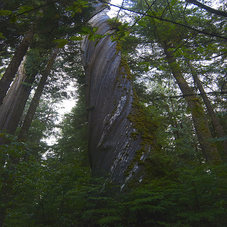



[2 9]
********Original*******
original image
Matrix num: 0 idx: 2: image file: 2.jpg
near neighbor image


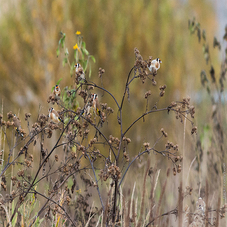



********Neighbor*******
original image
Matrix num: 0 idx: 9: image file: 9.jpg
near neighbor image


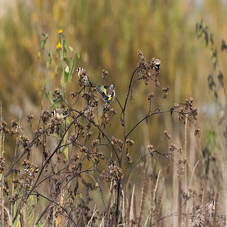



[  3 284]
********Original*******
original image
Matrix num: 0 idx: 3: image file: 3.jpg
near neighbor image


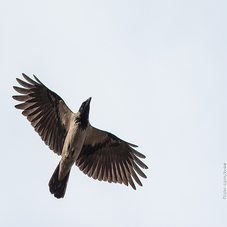



********Neighbor*******
original image
Matrix num: 2 idx: 84: image file: 284.jpg
near neighbor image


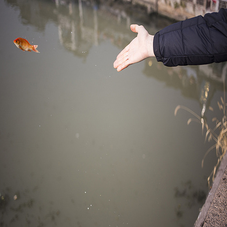



[4 9]
********Original*******
original image
Matrix num: 0 idx: 4: image file: 4.jpg
near neighbor image


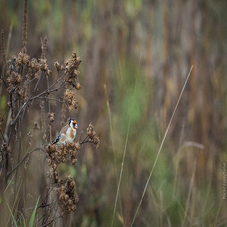



********Neighbor*******
original image
Matrix num: 0 idx: 9: image file: 9.jpg
near neighbor image


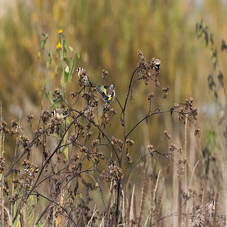



[5 6]
********Original*******
original image
Matrix num: 0 idx: 5: image file: 5.jpg
near neighbor image


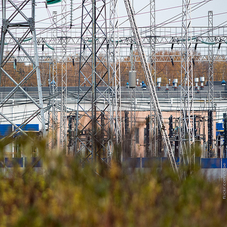



********Neighbor*******
original image
Matrix num: 0 idx: 6: image file: 6.jpg
near neighbor image


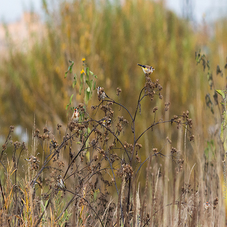



[6 9]
********Original*******
original image
Matrix num: 0 idx: 6: image file: 6.jpg
near neighbor image


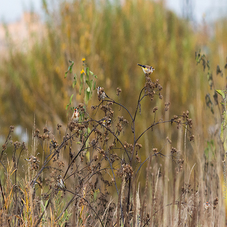



********Neighbor*******
original image
Matrix num: 0 idx: 9: image file: 9.jpg
near neighbor image


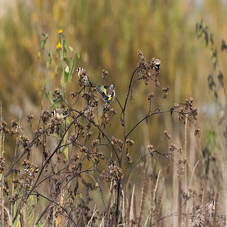



[ 7 76]
********Original*******
original image
Matrix num: 0 idx: 7: image file: 7.jpg
near neighbor image


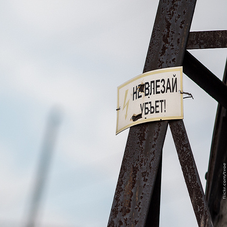



********Neighbor*******
original image
Matrix num: 0 idx: 76: image file: 76.jpg
near neighbor image


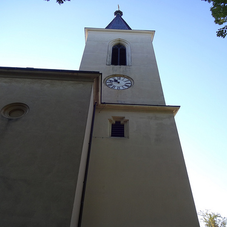



[8 6]
********Original*******
original image
Matrix num: 0 idx: 8: image file: 8.jpg
near neighbor image


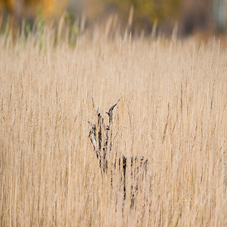



********Neighbor*******
original image
Matrix num: 0 idx: 6: image file: 6.jpg
near neighbor image


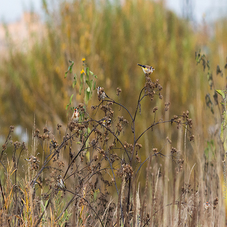



[9 6]
********Original*******
original image
Matrix num: 0 idx: 9: image file: 9.jpg
near neighbor image


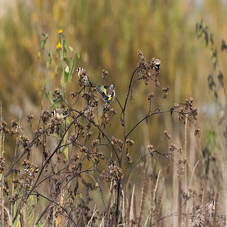



********Neighbor*******
original image
Matrix num: 0 idx: 6: image file: 6.jpg
near neighbor image


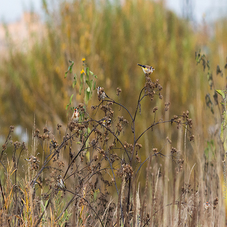

In [99]:


### takes 10 random images, prints image closest to it
import random

for i in range(10):
    random_image = i #random.randrange(0, 568)              
    distance, neighbours = T.query(nparr[random_image], k=2)
    print(neighbours)
    print("********Original*******") 
    print_og(random_image)
    print("********Neighbor*******") 
    print_og(neighbours[1])

